# Structure Learning

In [2]:
using BayesNets
using PGFPlots

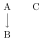

In [3]:
b = BayesNet([:A, :B, :C])
addEdge!(b, :A, :B)
setCPD!(b, :A, CPDs.Bernoulli(0.5))
setCPD!(b, :B, CPDs.Bernoulli(m->(m[:A] ? 0.5 : 0.45)))
setCPD!(b, :C, CPDs.Bernoulli(0.5))
b

In [4]:
d = randTable(b, numSamples = 5)

,A,B,C
1,true,true,true
2,true,true,true
3,true,false,false
4,true,true,true
5,false,false,true


In [5]:
count(b, d)

3-element Array{DataFrame,1}:
 2x2 DataFrame
| Row | A     | count |
|-----|-------|-------|
| 1   | true  | 4     |
| 2   | false | 1     |                                                                
 3x3 DataFrame
| Row | A     | B     | count |
|-----|-------|-------|-------|
| 1   | true  | true  | 3     |
| 2   | true  | false | 1     |
| 3   | false | false | 1     |
 2x2 DataFrame
| Row | C     | count |
|-----|-------|-------|
| 1   | true  | 4     |
| 2   | false | 1     |

In [6]:
prior(b)

3-element Array{Any,1}:
 2x1 Array{Float64,2}:
 1.0
 1.0          
 2x2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0
 2x1 Array{Float64,2}:
 1.0
 1.0          

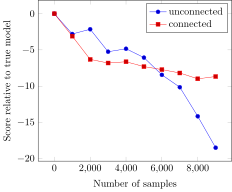

In [7]:
srand(0)
# generate a lot of data
d = randTable(b, numSamples = 10000);
# unconnected
bUnconnected = BayesNet([:A, :B, :C])
scoreUnconnected = Float64[logBayesScore(bUnconnected, d[1:i,:]) for i = 1:1000:size(d,1)]
# fully connected
bConnected = BayesNet([:A, :B, :C])
addEdge!(bConnected, :A, :B)
addEdge!(bConnected, :A, :C)
addEdge!(bConnected, :B, :C)
scoreConnected = Float64[logBayesScore(bConnected, d[1:i,:]) for i = 1:1000:size(d,1)]
# true
scoreTrue = Float64[logBayesScore(b, d[1:i,:]) for i = 1:1000:size(d,1)]
# plot
Axis(Plots.Plot[
    Plots.Linear([1.:1000:size(d,1)], scoreUnconnected - scoreTrue, legendentry="unconnected"),
    Plots.Linear([1.:1000:size(d,1)], scoreConnected - scoreTrue, legendentry="connected")
    ], xlabel="Number of samples", ylabel="Score relative to true model")